# Part - 1: Building the GradCam without the Cutout (Simply using my Assignment 6) 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [121]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/Cifar/cifar-10-batches-py.tar.gz' '/content/cifar-10-batches-py.tar.gz'

In [5]:
!cp '/content/cifar-10-batches-py.tar.gz' ~/.keras/datasets/

cp: cannot create regular file '/root/.keras/datasets/': Not a directory


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

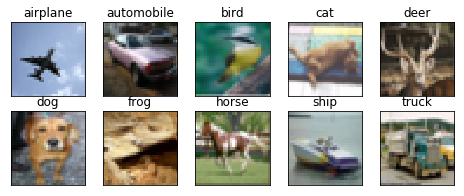

In [124]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import SpatialDropout2D

In [10]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #03
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                          #05
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                         #07
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #14
model.add(Convolution2D(32,1,1))                                                #14
model.add(Activation('relu'))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #17
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                          #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #40
model.add(Convolution2D(32,1,1, border_mode='same'))                            #40
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #43
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #46
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(10, 3, 3, border_mode='same', name = 'Decision'))        #49
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0630 17:28:44.461945 140338583336832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0630 17:28:44.505057 140338583336832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 17:28:44.514442 140338583336832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 17:28:44.

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0630 17:28:57.629445 140338583336832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 30s 77ms/step - loss: 1.5384 - acc: 0.4638 - val_loss: 1.7054 - val_acc: 0.4366
Epoch 2/100
390/390 [==============================] - 25s 64ms/step - loss: 1.1219 - acc: 0.6277 - val_loss: 1.1379 - val_acc: 0.6129
Epoch 3/100
390/390 [==============================] - 25s 64ms/step - loss: 0.9466 - acc: 0.6869 - val_loss: 0.8320 - val_acc: 0.7180
Epoch 4/100
390/390 [==============================] - 25s 63ms/step - loss: 0.8283 - acc: 0.7271 - val_loss: 0.8562 - val_acc: 0.7159
Epoch 5/100
390/390 [==============================] - 25s 63ms/step - loss: 0.7382 - acc: 0.7573 - val_loss: 0.6623 - val_acc: 0.7793
Epoch 6/100
390/390 [==============================] - 25s 63ms/step - loss: 0.6708 - acc: 0.7795 - val_loss: 0.6623 - val_acc: 0.7781
Epoch 7/100
390/390 [==============================] - 24s 63ms/step - loss: 0.6196 - acc: 0.7943 - val_loss: 0.7111 - val_acc: 0.7617
Epoch 8/100
390/390 [==============================] - 

KeyboardInterrupt: ignored

In [0]:
# Save the weights
# model.save_weights('/content/drive/My Drive/Cifar/My_6A_2_Checkpoint')

In [0]:
# Restore the weights
model.load_weights('/content/drive/My Drive/Cifar/My_6A_2_Checkpoint')

In [15]:
loss,acc = model.evaluate(test_features, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 2s 193us/step
Restored model, accuracy: 86.42%


In [0]:
# I don't know what all libraries required, so importing all :-D

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

Original Label[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label 8
0
Original Label[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label 9
1
Original Label[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label 0
2
Original Label[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label 1
3


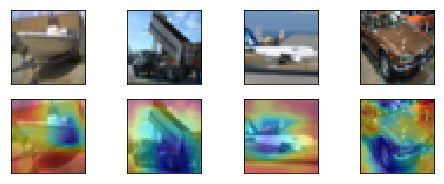

In [110]:
'''
'airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck'
'''

# Manually selected 4 images 
test_img_numbers = [1600,50,90,2000]

# Creating an array to hold images. There may be a better way! I am not sure yet
image_show_in_grid = np.uint8((np.arange(24576).reshape(8,32,32,3))/24576)

for test_img_idx in range(4):

  # Get the image
  img = test_features[test_img_numbers[test_img_idx],:,:,:]
  
  print ('Original Label' + str(test_labels[test_img_idx,:]))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  #print (preds)
  class_idx = np.argmax(preds[0])
  print ('Predicted label ' + str(class_idx))

  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("Decision")

  # Generate HeatMap
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  img = test_features[test_img_numbers[test_img_idx],:,:,:]


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  img = np.uint8(255 * img)

  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

  #plt.imshow(superimposed_img)

  image_show_in_grid[test_img_idx,:,:,:]  = img 
  image_show_in_grid[test_img_idx+4,:,:,:] = superimposed_img
  print(test_img_idx)
  

fig = plt.figure(figsize=(8,3))
for i in range(8):
    ax = fig.add_subplot(2, 4, 1 + i, xticks=[], yticks=[])
    im = image_show_in_grid[i, :,:,:]
    plt.imshow(im)
plt.show()


# Part - 2: Building the GradCam with the Cutout 

In [0]:
# Copied code from
# https://github.com/yu4u/cutout-random-erasing/blob/master/random_eraser.py


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [130]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #03
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                          #05
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                         #07
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #14
model.add(Convolution2D(32,1,1))                                                #14
model.add(Activation('relu'))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #17
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                          #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #40
model.add(Convolution2D(32,1,1, border_mode='same'))                            #40
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #43
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #46
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(10, 3, 3, border_mode='same', name = 'Decision'))        #49
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 40s 102ms/step - loss: 2.3039 - acc: 0.1018 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
390/390 [==============================] - 37s 96ms/step - loss: 2.2009 - acc: 0.1536 - val_loss: 2.1196 - val_acc: 0.2165
Epoch 3/50
390/390 [==============================] - 38s 97ms/step - loss: 1.7050 - acc: 0.3853 - val_loss: 1.7192 - val_acc: 0.3651
Epoch 4/50
390/390 [==============================] - 38s 97ms/step - loss: 1.4545 - acc: 0.4870 - val_loss: 1.2147 - val_acc: 0.5753
Epoch 5/50
390/390 [==============================] - 38s 99ms/step - loss: 1.2704 - acc: 0.5578 - val_loss: 1.0330 - val_acc: 0.6396
Epoch 6/50
390/390 [==============================] - 39s 99ms/step - loss: 1.1343 - acc: 0.6083 - val_loss: 0.9298 - val_acc: 0.6777
Epoch 7/50
390/390 [==============================] - 38s 97ms/step - loss: 1.0372 - acc: 0.6451 - val_loss: 0.8361 - val_acc: 0.7148
Epoch 8/50
390/390 [==============================] - 38s 97m

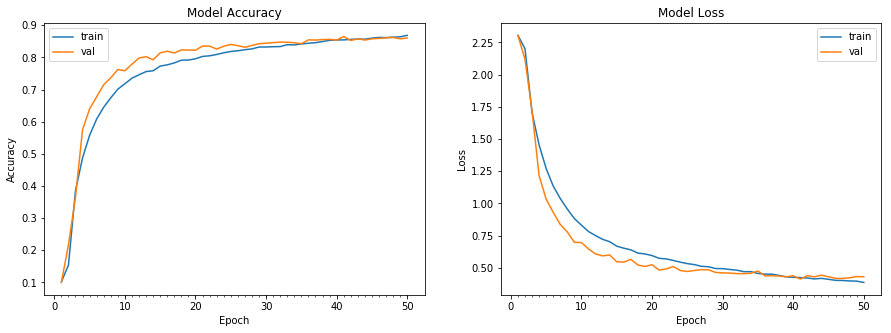

Accuracy on test data is: 86.03


In [134]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, 
                             preprocessing_function=get_random_eraser(p=0.5, s_l = 0.02, s_h = 0.4))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Save the weights
# model.save_weights('/content/drive/My Drive/Cifar/My_Ass_9_Checkpoint')

In [0]:
# Restore the weights
model.load_weights('/content/drive/My Drive/Cifar/My_6A_2_Checkpoint')

In [138]:
loss,acc = model.evaluate(test_features, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 2s 222us/step
Restored model, accuracy: 86.42%


Original Label[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label 8
0
Original Label[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label 9
1
Original Label[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label 0
2
Original Label[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label 1
3


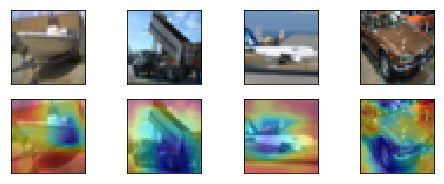

In [139]:
'''
'airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck'
'''

# Manually selected 4 images 
test_img_numbers = [1600,50,90,2000]

# Creating an array to hold images. There may be a better way! I am not sure yet
image_show_in_grid = np.uint8((np.arange(24576).reshape(8,32,32,3))/24576)

for test_img_idx in range(4):

  # Get the image
  img = test_features[test_img_numbers[test_img_idx],:,:,:]
  
  print ('Original Label' + str(test_labels[test_img_idx,:]))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  #print (preds)
  class_idx = np.argmax(preds[0])
  print ('Predicted label ' + str(class_idx))

  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("Decision")

  # Generate HeatMap
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  img = test_features[test_img_numbers[test_img_idx],:,:,:]


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  img = np.uint8(255 * img)

  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

  #plt.imshow(superimposed_img)

  image_show_in_grid[test_img_idx,:,:,:]  = img 
  image_show_in_grid[test_img_idx+4,:,:,:] = superimposed_img
  print(test_img_idx)
  

fig = plt.figure(figsize=(8,3))
for i in range(8):
    ax = fig.add_subplot(2, 4, 1 + i, xticks=[], yticks=[])
    im = image_show_in_grid[i, :,:,:]
    plt.imshow(im)
plt.show()
